In [5]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6d882e3199d55da8694838dacf5a94956167bf1857a142b3e0ef692af61d68e4
  Stored in directory: /Users/arjun/Library/Caches/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf  # To fetch Bitcoin price data
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

# Step 1: Fetch Bitcoin price data for the specified date range
bitcoin_data = yf.download("BTC-USD", start="2024-11-02", end="2024-11-09", interval="1h")  # Hourly data

# Step 2: Flatten the multi-level column index
bitcoin_data.columns = bitcoin_data.columns.droplevel(1)  

# Step 2: Check the column names
print("Column names:", bitcoin_data.columns)  # Debugging

# Step 3: Ensure 'Close' is a 1D Series
bitcoin_data['Close'] = bitcoin_data['Close'].squeeze()  # Convert to 1D Series
print("Type of 'Close' column:", type(bitcoin_data['Close']))  # Debugging
print("Shape of 'Close' column:", bitcoin_data['Close'].shape)  # Debugging








[*********************100%***********************]  1 of 1 completed

Column names: Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Type of 'Close' column: <class 'pandas.core.series.Series'>
Shape of 'Close' column: (168,)


In [57]:
# Step 4: Calculate RSI
rsi_indicator = RSIIndicator(bitcoin_data['Close'], window=14)  # 14-period RSI
bitcoin_data['RSI'] = rsi_indicator.rsi()


In [59]:
# Step 5: Calculate Bollinger Bands
bollinger_bands = BollingerBands(bitcoin_data['Close'], window=20, window_dev=2)  # 20-period Bollinger Bands
bitcoin_data['Bollinger_High'] = bollinger_bands.bollinger_hband()
bitcoin_data['Bollinger_Low'] = bollinger_bands.bollinger_lband()
bitcoin_data['Bollinger_Mid'] = bollinger_bands.bollinger_mavg()  # Middle band (20-period SMA)

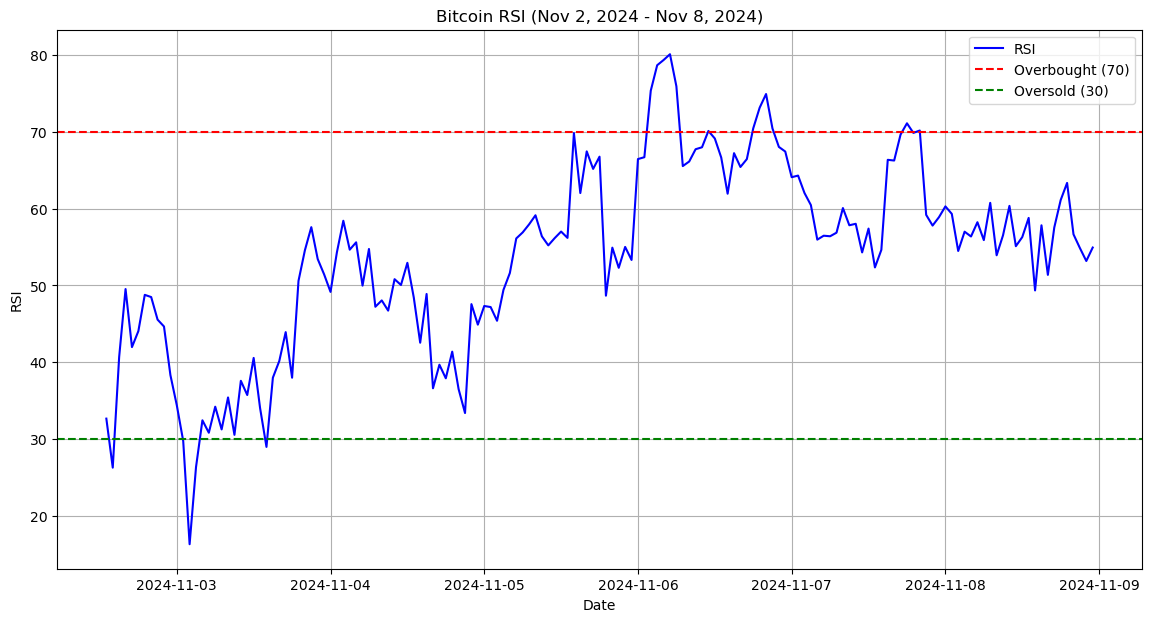

In [61]:
# Step 6: Plot RSI Chart
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data.index, bitcoin_data['RSI'], color='blue', label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Bitcoin RSI (Nov 2, 2024 - Nov 8, 2024)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()

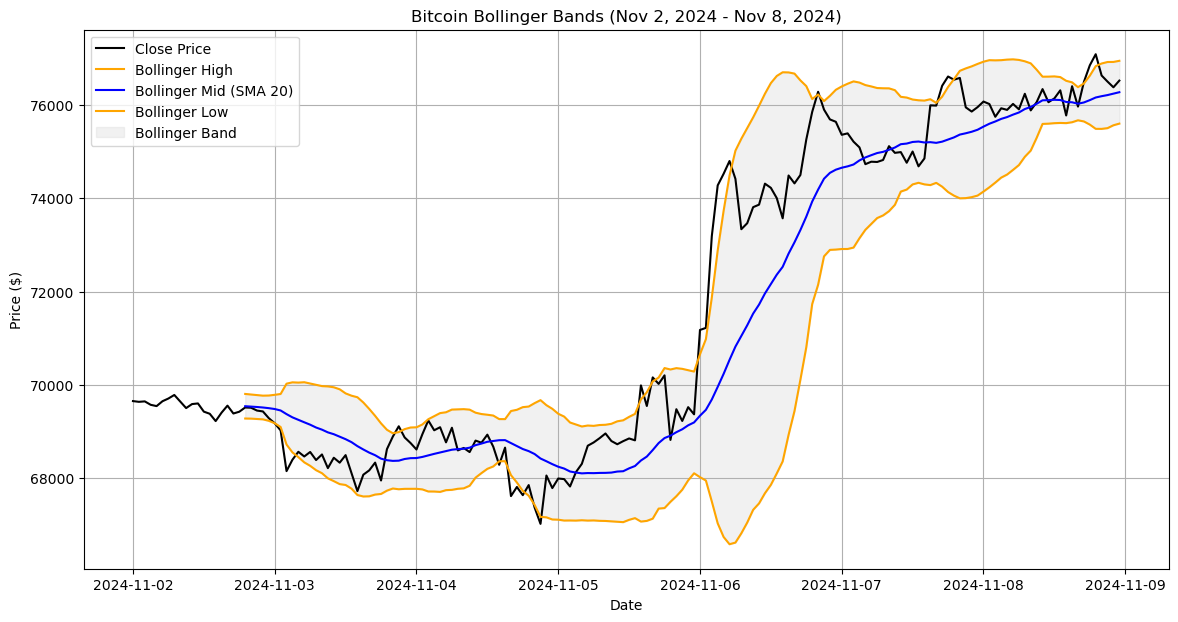

In [63]:
# Step 7: Plot Bollinger Bands Chart
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data.index, bitcoin_data['Close'], color='black', label='Close Price')
plt.plot(bitcoin_data.index, bitcoin_data['Bollinger_High'], color='orange', label='Bollinger High')
plt.plot(bitcoin_data.index, bitcoin_data['Bollinger_Mid'], color='blue', label='Bollinger Mid (SMA 20)')
plt.plot(bitcoin_data.index, bitcoin_data['Bollinger_Low'], color='orange', label='Bollinger Low')
plt.fill_between(bitcoin_data.index, bitcoin_data['Bollinger_High'], bitcoin_data['Bollinger_Low'], color='lightgray', alpha=0.3, label='Bollinger Band')
plt.title('Bitcoin Bollinger Bands (Nov 2, 2024 - Nov 8, 2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


Type of 'Close' column: <class 'pandas.core.series.Series'>
Shape of 'Close' column: (168,)


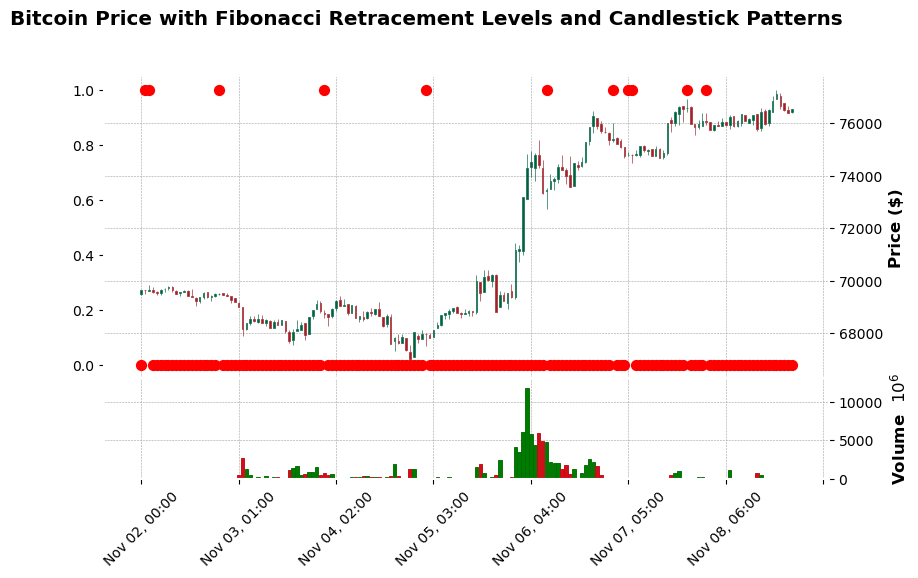

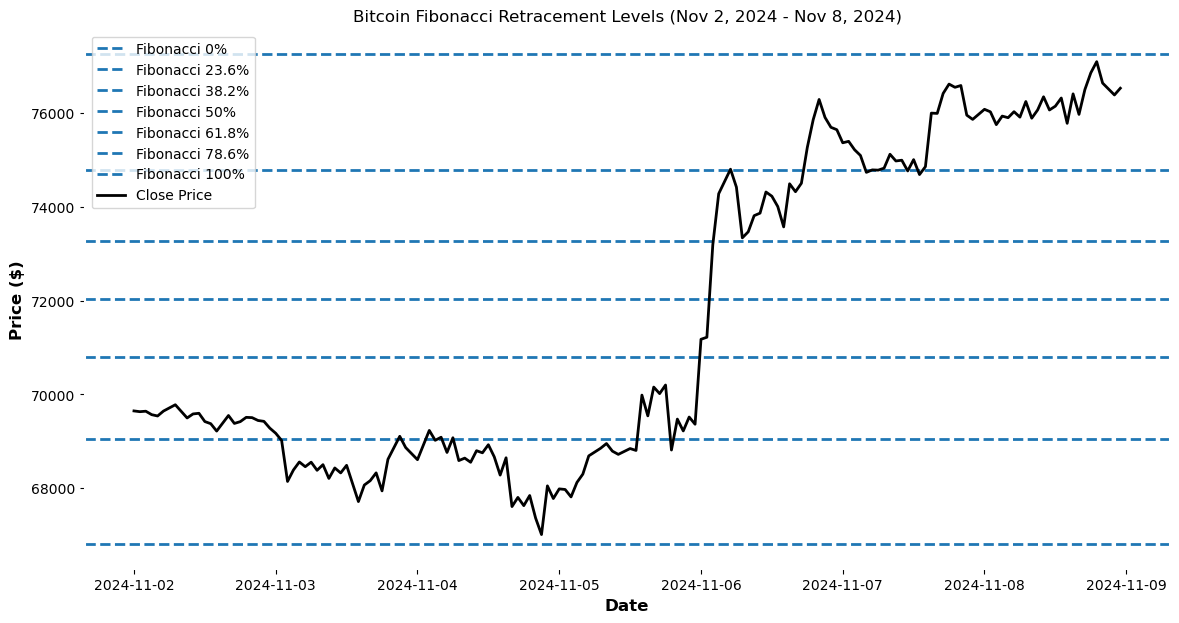

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf  # To fetch Bitcoin price data
import mplfinance as mpf  # For candlestick charts
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

# Step 1: Fetch Bitcoin price data for the specified date range
bitcoin_data = yf.download("BTC-USD", start="2024-11-02", end="2024-11-09", interval="1h")  # Hourly data

# Step 2: Flatten the multi-level column index
bitcoin_data.columns = bitcoin_data.columns.droplevel(1)  # Remove the 'Ticker' level

# Step 3: Ensure 'Close' is a 1D Series
print("Type of 'Close' column:", type(bitcoin_data['Close']))  # Debugging
print("Shape of 'Close' column:", bitcoin_data['Close'].shape)  # Debugging

# Step 4: Calculate Fibonacci Retracement Levels
high = bitcoin_data['High'].max()  # Highest price in the dataset
low = bitcoin_data['Low'].min()    # Lowest price in the dataset
diff = high - low  # Price range

# Key Fibonacci levels
fib_levels = {
    '0%': high,
    '23.6%': high - 0.236 * diff,
    '38.2%': high - 0.382 * diff,
    '50%': high - 0.5 * diff,
    '61.8%': high - 0.618 * diff,
    '78.6%': high - 0.786 * diff,
    '100%': low
}

# Step 5: Identify Candlestick Patterns (Example: Doji)
def is_doji(row):
    """Identify a Doji candlestick pattern."""
    body = abs(row['Close'] - row['Open'])
    wick = row['High'] - row['Low']
    return body <= 0.1 * wick  # Body is less than 10% of the total wick

bitcoin_data['Doji'] = bitcoin_data.apply(is_doji, axis=1)

# Step 6: Plot Candlestick Chart with Fibonacci Levels and Candlestick Patterns
# Create additional plots for Fibonacci levels and Doji patterns
apds = [
    mpf.make_addplot(bitcoin_data['Doji'].astype(int), type='scatter', markersize=50, marker='o', color='red', panel=0),  # Highlight Doji patterns
]

# Plot the candlestick chart
mpf.plot(
    bitcoin_data,
    type='candle',
    style='charles',
    title='Bitcoin Price with Fibonacci Retracement Levels and Candlestick Patterns',
    ylabel='Price ($)',
    volume=True,
    addplot=apds,
    figratio=(14, 8),
    panel_ratios=(3, 1)  # Main chart and volume panel
)

# Overlay Fibonacci levels on the chart
plt.figure(figsize=(14, 7))
for level, price in fib_levels.items():
    plt.axhline(price, linestyle='--', label=f'Fibonacci {level}')
plt.plot(bitcoin_data.index, bitcoin_data['Close'], color='black', label='Close Price')
plt.title('Bitcoin Fibonacci Retracement Levels (Nov 2, 2024 - Nov 8, 2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

In [75]:
# Calculate the 7-day moving average
bitcoin_data['7_day_MA'] = bitcoin_data['Close'].rolling(window=7).mean()

# Display the data with the moving average
print(bitcoin_data[['Close', '7_day_MA']])

Price                             Close      7_day_MA
Datetime                                             
2024-11-02 00:00:00+00:00  69647.664062           NaN
2024-11-02 01:00:00+00:00  69631.617188           NaN
2024-11-02 02:00:00+00:00  69641.335938           NaN
2024-11-02 03:00:00+00:00  69567.789062           NaN
2024-11-02 04:00:00+00:00  69539.851562           NaN
...                                 ...           ...
2024-11-08 19:00:00+00:00  77094.273438  76417.820312
2024-11-08 20:00:00+00:00  76637.359375  76463.265625
2024-11-08 21:00:00+00:00  76506.554688  76567.152902
2024-11-08 22:00:00+00:00  76384.375000  76563.862723
2024-11-08 23:00:00+00:00  76527.921875  76643.579241

[168 rows x 2 columns]


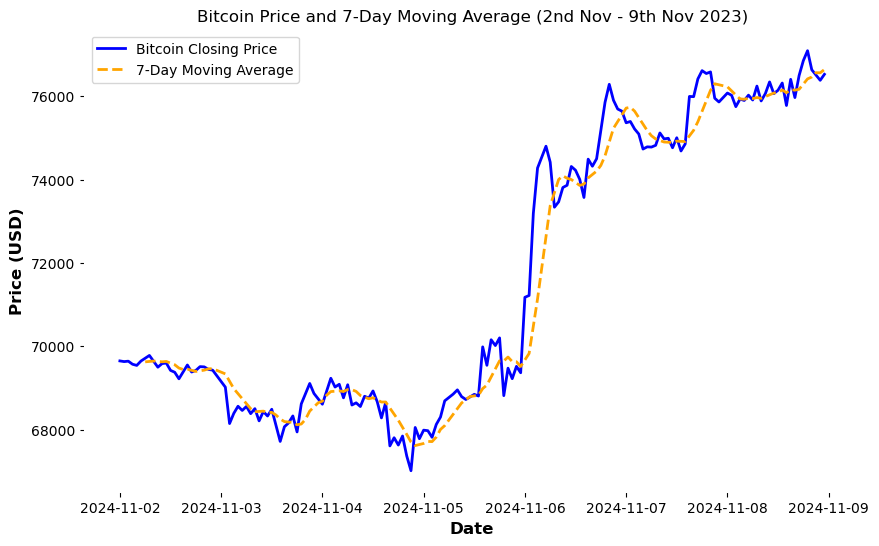

In [79]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_data['Close'], label='Bitcoin Closing Price', color='blue')
plt.plot(bitcoin_data['7_day_MA'], label='7-Day Moving Average', color='orange', linestyle='--')

# Add title and labels
plt.title('Bitcoin Price and 7-Day Moving Average (2nd Nov - 9th Nov 2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Show the plot
plt.grid()
plt.show()